# Walk Score

In [101]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [102]:
city = 'San_Diego'

In [103]:
page = requests.get('https://www.walkscore.com/CA/'+city)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.table('tr')[1:]
alldat = []
for entry in table:
    split = entry.get_text().split()
    data = {
            'city': city.replace('_', ' '),
            'neighborhood': ' '.join(split[1:-4]),
            'walk': float(split[-4].replace('-','nan')),
            'transit': float(split[-3].replace('-','nan')),
            'bike': float(split[-2].replace('-','nan')),
#             'pop': int(split[-1].replace(',','')),
#             'logpop': np.log(int(split[-1].replace(',','')))
        }
    alldat.append(data)

In [104]:
ws = pd.DataFrame(alldat)

In [105]:
ws

,bike,city,neighborhood,transit,walk
0,65.0,San Diego,Core-Columbia,81.0,98.0
1,82.0,San Diego,Horton Plaza,81.0,97.0
2,66.0,San Diego,Little Italy,77.0,97.0
3,77.0,San Diego,Gaslamp,80.0,97.0
4,74.0,San Diego,Harborview,75.0,97.0
5,54.0,San Diego,Cortez,78.0,94.0
6,84.0,San Diego,Marina,79.0,94.0
7,64.0,San Diego,East Village,78.0,93.0
8,52.0,San Diego,Village,33.0,88.0
9,59.0,San Diego,Sherman Heights,68.0,87.0


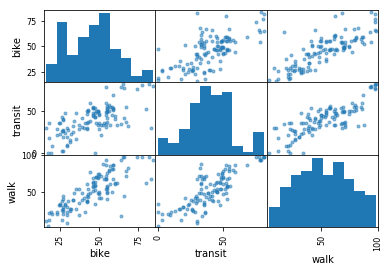

In [106]:
scatter = pd.scatter_matrix(ws)

In [107]:
import shapefile

In [108]:
ca_neighborhoods = shapefile.Reader("Data/CA Neighborhoods/ZillowNeighborhoods-CA.shp")
ca_neighborhood_metadata = ca_neighborhoods.shapeRecords()

In [109]:
sd_neighborhood_list = []
for i in range(len(ca_neighborhood_metadata)):
    if ca_neighborhood_metadata[i].record[2] == 'San Diego':
        sd_neighborhood_list.append(i)

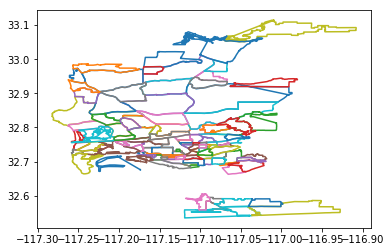

In [110]:
for i in sd_neighborhood_list:
    shape = ca_neighborhoods.shapes()[i]
    plt.plot(np.array(shape.points)[:,0], np.array(shape.points)[:,1])

In [12]:
for i in sd_neighborhood_list:
    print(ca_neighborhood_metadata[i].record[3] in ws['neighborhood'].tolist())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
False
True
False
True
True
True
True
True
False
True
True
True
False
True
True
True
False
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
False
True
False
True
True


# Census

In [13]:
API_KEY = '03e859cb7bc3642db769c4a6ce7ac8cf166d6ebe'

In [111]:
import shapefile

In [112]:
ca_tracts = shapefile.Reader("Data/CA Census Tracts/cb_2015_06_tract_500k.shp")

In [113]:
ca_tract_metadata = ca_tracts.shapeRecords()

In [114]:
sd_tract_list = []
for i in range(len(ca_tract_metadata)):
    if ca_tract_metadata[i].record[1] == '073':
        sd_tract_list.append(i)

KeyboardInterrupt: 

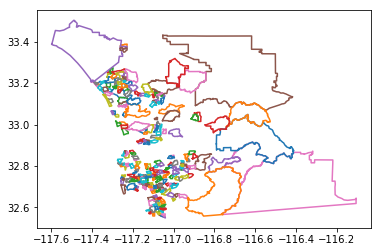

In [115]:
for i in sd_tract_list:
    shape = ca_tracts.shapes()[i]
    plt.plot(np.array(shape.points)[:,0], np.array(shape.points)[:,1])

# Matching tracts and neighborhoods

Example

In [142]:
import shapely
from shapely.geometry import Polygon

In [152]:
tract_shape = ca_tracts.shapes()[sd_tract_list[1]]
tract_poly = Polygon(tract_shape.points)

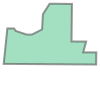

In [153]:
tract_poly

In [154]:
sd_tract_list[0]

387

In [155]:
coverages = []
for i in sd_neighborhood_list:
    neighborhood_shape = ca_neighborhoods.shapes()[i]
    neighborhood_poly = Polygon(neighborhood_shape.points)
    
    area = tract_poly.area
    intersect_area = tract_poly.intersection(neighborhood_poly).area
    coverage = intersect_area/area
    coverages.append(coverage) 
    if coverage > .5:
        break
best_neighborhood = sd_neighborhood_list[np.argmax(coverages)]
best_coverage = np.max(coverages)

In [156]:
neighborhood_shape = ca_neighborhoods.shapes()[best_neighborhood]
neighborhood_poly = Polygon(neighborhood_shape.points)

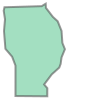

In [157]:
neighborhood_poly

In [158]:
best_neighborhood

663

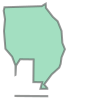

In [159]:
neighborhood_poly.difference(tract_poly)

In [160]:
best_coverage

0.64271708937554295

Populate full dictionary

In [165]:
neighborhood_tracts = {}
for i in sd_tract_list[:10]:
    tract_shape = ca_tracts.shapes()[i]
    tract_poly = Polygon(tract_shape.points)
    
    coverages = []
    for j in sd_neighborhood_list:
        neighborhood_shape = ca_neighborhoods.shapes()[j]
        neighborhood_poly = Polygon(neighborhood_shape.points)

        area = tract_poly.area
        intersect_area = tract_poly.intersection(neighborhood_poly).area
        coverage = 0 if area == 0 else intersect_area/area
        coverages.append(coverage) 
        if coverage > .5:
            break
    
    best_neighborhood = sd_neighborhood_list[np.argmax(coverages)]
    best_coverage = np.max(coverages)
    
    if best_neighborhood not in neighborhood_tracts:
        neighborhood_tracts[best_neighborhood] = {
            'tracts': [i],
            'coverages': [best_coverage]
        }
    else:
        entry = neighborhood_tracts[best_neighborhood]
        entry['tracts'].append(i)
        entry['coverages'].append(best_coverage)

KeyboardInterrupt: 

In [166]:
neighborhood_tracts

{79: {'coverages': [0.96740606489498049], 'tracts': [387]}}

In [162]:
import json
with open('Data/neighborhood_tracts.json', 'w') as fp:
    json.dump(neighborhood_tracts, fp)